### Marketing Bancário


![marketing bank image](../data/raw/dataset-cover.jpeg)


### Contexto
Este estudo tem como objetivo analisar o conjunto de dados Bank Marketing, que reune informações sobre campanhas de marketing direto bancárias. 
Define-se por marketing direto uma estratégia de comunicação e vendas que envolve a interação direta com o consumidor utilizando canais como e-mail, mensagems de texto, redes sociais ou ligações telefônicas que é foco utilizado.

**A proposta deste estudo é avaliar a relação das variáveis qualitativas do dataset aplicando a técnica de análise e correspondência múltipla (MCA).**

obs.: por se tratar uma técnica que se utiliza exclusivamente de variáveis qualitativas, para o estudo será utilizado somente variáveis qualitativas do dataset, com excessão da variáveil age (idade) que passará por um processo de categorização seguindo a respectiva regra:

- 15 a 17 anos - young
- 18 a 29 anos - young adult
- 30 a 59 anos - Adult
- 60 anos ou mais - Elderly




In [1]:
# Carregando pacotes

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('__file__'), '..')))
from src.utils import analise_univariada
from src.utils import mapa_percptual
from src.acm_analysis import chi2
from src.acm_analysis import mca

In [2]:
# carregando dados 
df_banking = pd.read_csv('../data/processed/bank_marketing_processed.csv')
df_banking.head()

,age,job,marital,education,default,housing,loan
0,Adult,housemaid,married,basic,no,no,no
1,Adult,services,married,high school,unknown,no,no
2,Adult,services,married,high school,no,yes,no
3,Adult,admin.,married,basic,no,no,no
4,Adult,services,married,high school,no,no,yes


In [3]:
# Verificando as colunas do DataFrame
df_banking.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')

## Dicionário de Variáveis


|VARIÁVEL         |TRADUÇÃO             |
|-----------------|---------------------|
|Age              | Idade do cliente    |
|Job              | Tipo de emprego     |
|Marital          | Estado Civil        |
|Education        | Nível de educação   |
|Default          | Possui crédito em inadimplência ?|
|Housing          | Possui empréstimo imobiliário ?|
|loan             | Tem empréstimo pessoal ?| 



In [4]:
# Tamanho do dataset
df_banking.shape

(41188, 7)

In [5]:
# verificando os tipos das variáveis
df_banking.dtypes

age          object
job          object
marital      object
education    object
default      object
housing      object
loan         object
dtype: object

In [6]:
# Dados faltantes
df_banking.isnull().sum()/len(df_banking)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
housing      0.0
loan         0.0
dtype: float64

De acordo com a célula anterior o dataset não possui valores faltantes em nenhuma das variáveis 

## Análise univariada das variávies

Tabela de Frequencia age


,age,Frequency,Percent
0,Adult,34326,83.34
1,young adult,5664,13.75
2,Elderly,1193,2.90
3,young,5,0.01
4,Total,41188,100.00


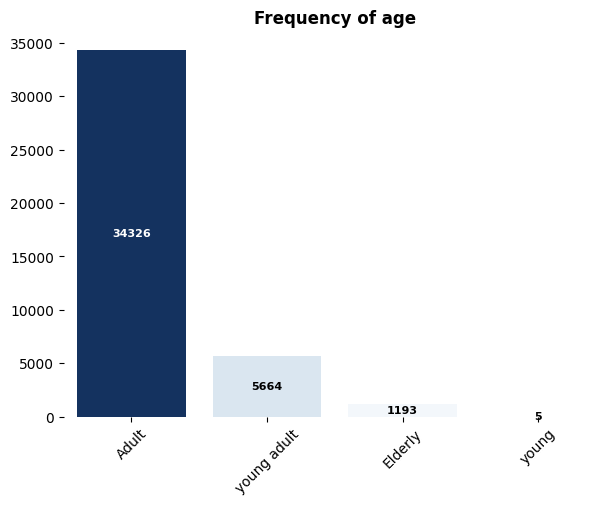

In [7]:
analise_univariada(df_banking, 'age')

Tabela de Frequencia job


,job,Frequency,Percent
0,admin.,10422,25.30
1,blue-collar,9254,22.47
2,technician,6743,16.37
3,services,3969,9.64
4,management,2924,7.10
5,retired,1720,4.18
6,entrepreneur,1456,3.54
7,self-employed,1421,3.45
8,housemaid,1060,2.57
9,unemployed,1014,2.46


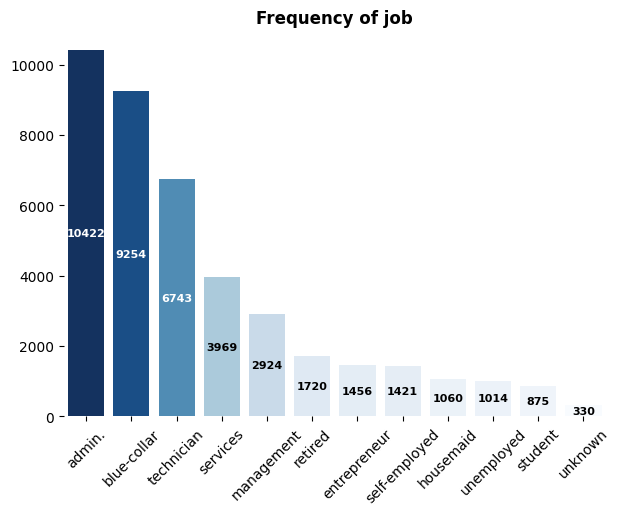

In [8]:
analise_univariada(df_banking, 'job')

Tabela de Frequencia marital


,marital,Frequency,Percent
0,married,24928,60.52
1,single,11568,28.09
2,divorced,4612,11.20
3,unknown,80,0.19
4,Total,41188,100.00


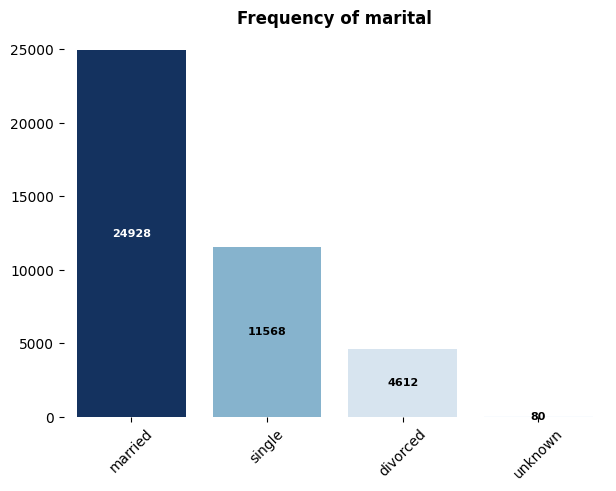

In [9]:
analise_univariada(df_banking, 'marital')

Tabela de Frequencia education


,education,Frequency,Percent
0,basic,12513,30.38
1,university degree,12168,29.54
2,high school,9515,23.10
3,professional course,5243,12.73
4,unknown,1731,4.20
5,illiterate,18,0.04
6,Total,41188,100.00


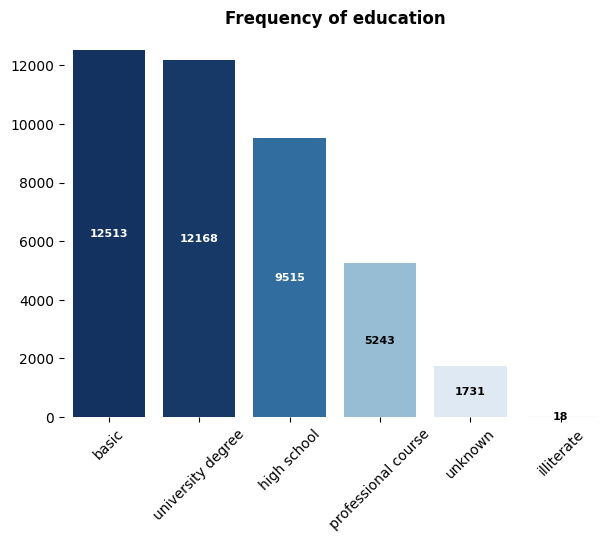

In [10]:
analise_univariada(df_banking, 'education')

Tabela de Frequencia default


,default,Frequency,Percent
0,no,32588,79.12
1,unknown,8597,20.87
2,yes,3,0.01
3,Total,41188,100.00


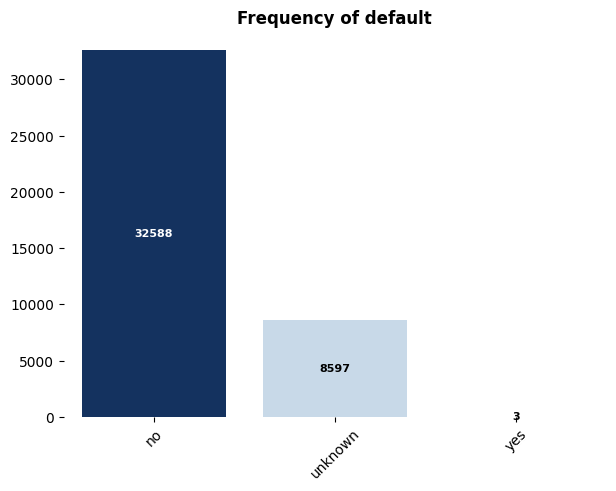

In [11]:
analise_univariada(df_banking, 'default')

Tabela de Frequencia housing


,housing,Frequency,Percent
0,yes,21576,52.38
1,no,18622,45.21
2,unknown,990,2.40
3,Total,41188,100.00


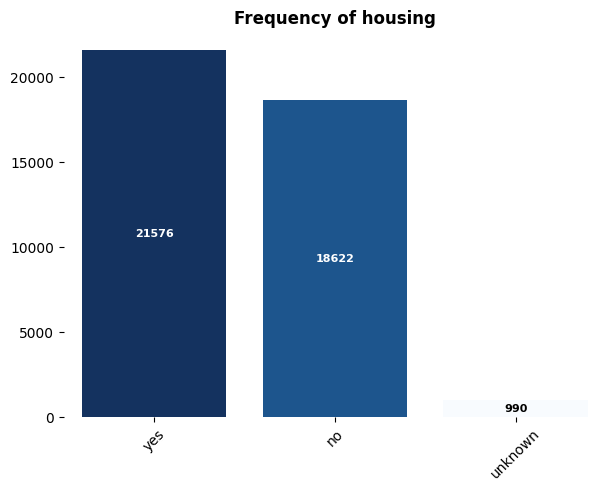

In [12]:
analise_univariada(df_banking, 'housing')

Tabela de Frequencia loan


,loan,Frequency,Percent
0,no,33950,82.43
1,yes,6248,15.17
2,unknown,990,2.40
3,Total,41188,100.00


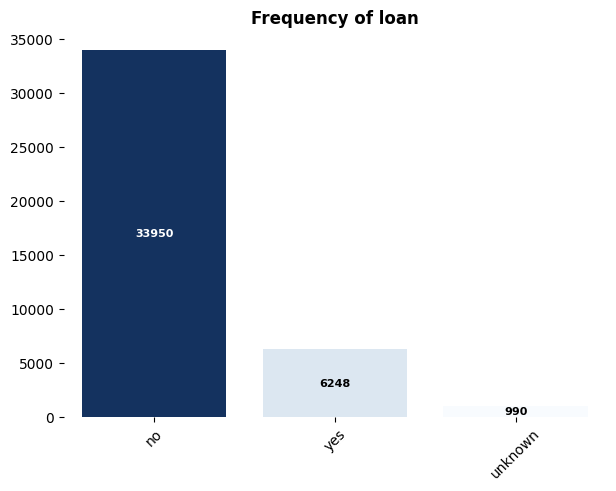

In [13]:
analise_univariada(df_banking, 'loan')

## Interpretação dos resultados obtidos:
 - idade: 83% dos clientes são adultos entre 30 e 59 anos
 - job: 64,14 % dos clientes estão enquadrados nas profissões administrativo, técnico e operário
 - Marital: 60,52% dos clientes são casados
 - education: o nível de educação básica se equipara ao nível graduado 30% dos clientes alegam ter ensino básico enquanto 29,54% declara ter graduação
 - deafult: 79% não possui crédito em inadimplência
 - housing: 52% dos clientes declaram possuir empréstimo imobiliário
 - loan: 82.43 dos clientes declaram não possuir empréstimo pessoal

Com base nesses dados, o perfil predominante dos clientes pode ser descrito como:
adultos, casados, empregados em funções operacionais ou administrativas, com escolaridade básica ou superior, sem histórico de inadimplência, com financiamento imobiliário ativo e sem dívidas de empréstimo pessoal.

## Aplicação da Análise de Correspondência Múltipla



### Teste qui-quadrado:

A primeira etapa antes da aplicação da técnica de Análise de Correspondência Múltipla (ACM) é a realização do teste de qui-quadrado para verificar se existe associação estatisticamente significativa entre pelo menos duas variáveis, o que justifica o uso da ACM.

O teste é baseado nas seguintes hipóteses:

- H₀ (hipótese nula): As variáveis são independentes, ou seja, a associação entre elas ocorre de forma aleatória.

- H₁ (hipótese alternativa): Existe uma associação significativa entre as variáveis, que não ocorre de forma aleatória.



In [14]:
chi2(df_banking)

Teste qui-quadrado entre age e job
Estatística qui-quadrado: 15561.36046436082
p-valor da estatística: 0.0
Graus de liberdade: 33 

Teste qui-quadrado entre age e marital
Estatística qui-quadrado: 5620.153045882025
p-valor da estatística: 0.0
Graus de liberdade: 9 

Teste qui-quadrado entre age e education
Estatística qui-quadrado: 644.5188493594806
p-valor da estatística: 0.0
Graus de liberdade: 15 

Teste qui-quadrado entre age e default
Estatística qui-quadrado: 493.9721542326565
p-valor da estatística: 0.0
Graus de liberdade: 6 

Teste qui-quadrado entre age e housing
Estatística qui-quadrado: 9.13218550182265
p-valor da estatística: 0.1663
Graus de liberdade: 6 

Teste qui-quadrado entre age e loan
Estatística qui-quadrado: 9.694030570967618
p-valor da estatística: 0.1381
Graus de liberdade: 6 

Teste qui-quadrado entre job e marital
Estatística qui-quadrado: 4197.469142542189
p-valor da estatística: 0.0
Graus de liberdade: 33 

Teste qui-quadrado entre job e education
Estatística

Adotando-se um nível de significância de 5%, rejeita-se a hipótese nula (H₀) e aceita-se a hipótese alternativa (H₁), indicando que existe associação estatisticamente significativa entre as variáveis, permitindo, assim, a aplicação da técnica de Análise de Correspondência Múltipla (ACM).

Observação: O teste de qui-quadrado foi aplicado a todas as combinações possíveis entre pares de variáveis. Os resultados indicaram ausência de associação significativa em alguns casos, como:

age × housing

age × loan

job × loan

marital × loan

education × loan

default × loan

No entanto, as variáveis mencionadas apresentaram associação significativa com outras variáveis do conjunto de dados e, por isso, serão mantidas na análise com ACM.

Número de dimensões: 28
Quantidade de Variáveis: 7
Quantidade Total de Categorias: 35
          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.287         7.17%                      7.17%
1              0.280         6.99%                     14.16%
4.0000000000000195


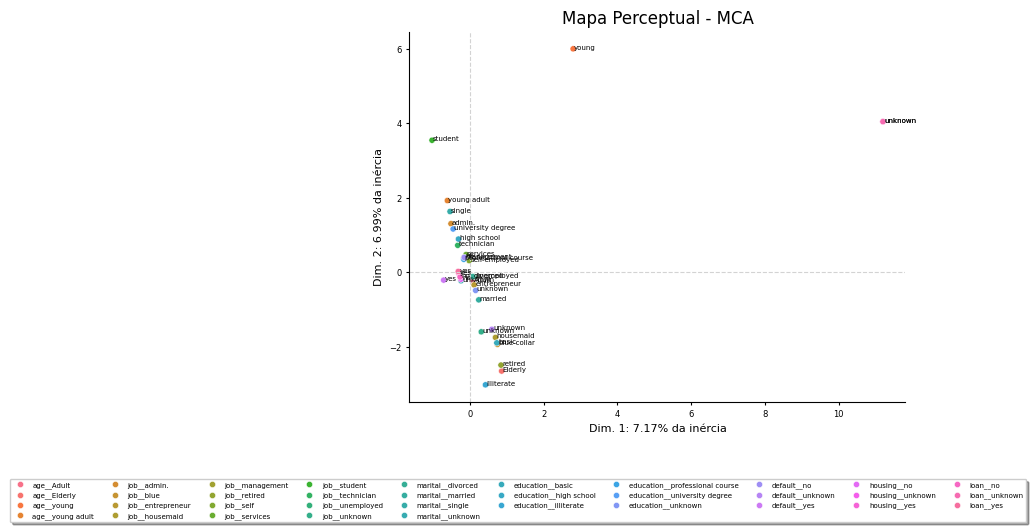

In [16]:
cord_p, cord_obs, tabela_autovalores=mca(df_banking,2)
mapa_percptual(df_banking,cord_p,tabela_autovalores)